In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('Netflix Userbase.csv', parse_dates=['Join Date', 'Last Payment Date'])
type(df['Join Date'][0])
type(df['Last Payment Date'][0])
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month


In [24]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [25]:
df['Usage Time']=(df['Last Payment Date'] - df['Join Date']) / np.timedelta64(1, 'D')
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Usage Time
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629.0
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774.0
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119.0
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262.0
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174.0
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,500.0
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,462.0
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,310.0
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,364.0


In [26]:
sub=df['Subscription Type'].value_counts()
sub

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

<AxesSubplot:ylabel='Subscription Type'>

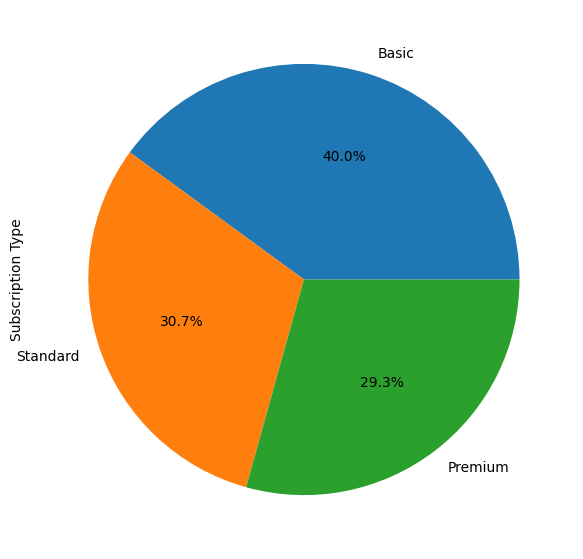

In [27]:
sub.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))

In [28]:
df['start month'] = df['Join Date'].dt.month
start_month_counts = df['start month'].value_counts().sort_index()
start_month_counts

1      88
2      92
3     103
4     108
5     135
6     338
7     396
8     296
9     306
10    418
11    122
12     98
Name: start month, dtype: int64

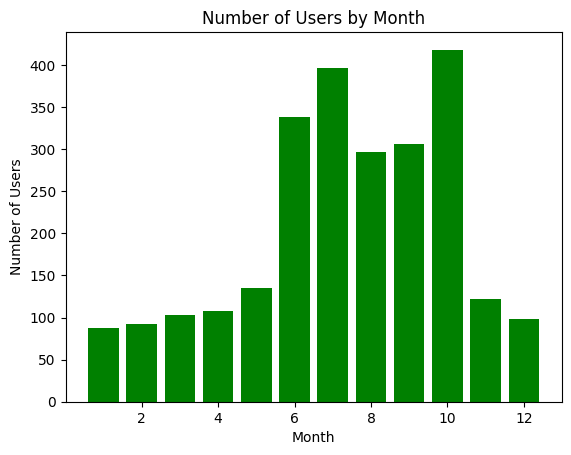

In [29]:
plt.bar(start_month_counts.index, start_month_counts,color='green')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Number of Users by Month')
plt.show()

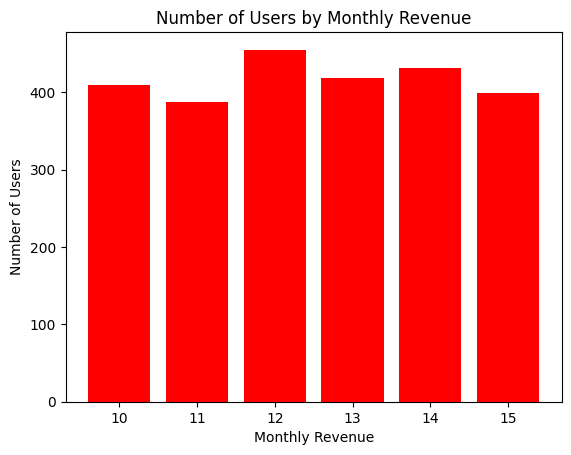

In [30]:
plt.bar(df['Monthly Revenue'].value_counts().index, df['Monthly Revenue'].value_counts(),color='red')
plt.xlabel('Monthly Revenue')
plt.ylabel('Number of Users')
plt.title('Number of Users by Monthly Revenue')
plt.show()

In [31]:
df['renewal period'] = (df['Last Payment Date'] - df['Join Date']).dt.days

renewal_counts = df['renewal period'].value_counts()
renewal_counts
renewal_rates = (renewal_counts / len(df))*100
renewal_rates

422    1.08
391    1.00
392    0.92
361    0.88
334    0.80
       ... 
58     0.04
52     0.04
49     0.04
100    0.04
467    0.04
Name: renewal period, Length: 481, dtype: float64

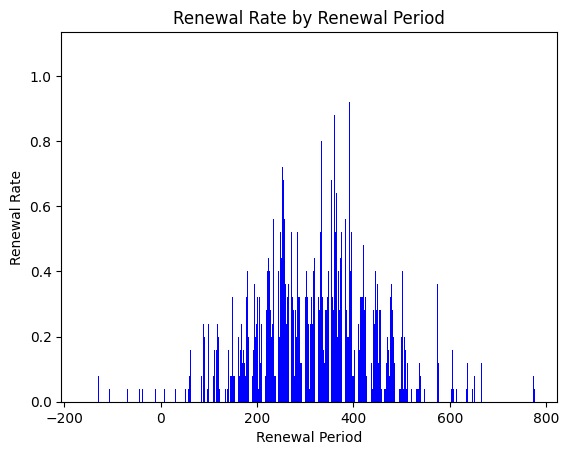

In [32]:
plt.bar(renewal_rates.index, renewal_rates,color='blue')
plt.xlabel('Renewal Period')
plt.ylabel('Renewal Rate')
plt.title('Renewal Rate by Renewal Period')
plt.show()

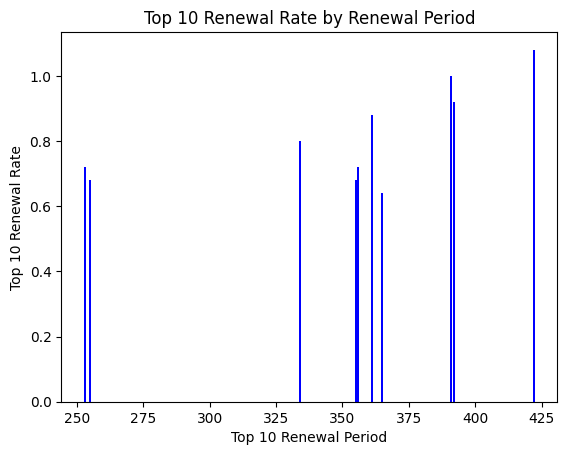

In [33]:
top_10_renewal_rates = renewal_rates.sort_values(ascending=False).head(10)
plt.bar(top_10_renewal_rates.index, top_10_renewal_rates,color='blue')
plt.xlabel('Top 10 Renewal Period')
plt.ylabel('Top 10 Renewal Rate')
plt.title('Top 10 Renewal Rate by Renewal Period')
plt.show()

In [34]:
device=df['Device'].value_counts()
device

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64

<AxesSubplot:ylabel='Device'>

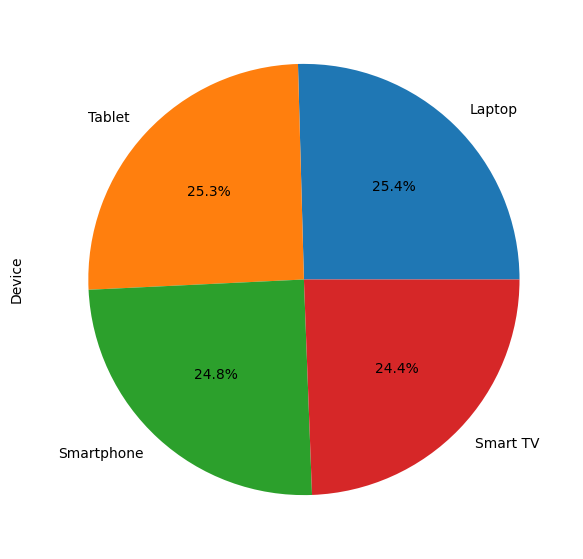

In [35]:
device.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))

In [36]:
df = df.drop(columns=['Join Date', 'Last Payment Date', 'User ID', 'Plan Duration', 'Gender'])
df

,Subscription Type,Monthly Revenue,Country,Age,Device,Usage Time,start month,renewal period
0,Basic,10,United States,28,Smartphone,629.0,1,629
1,Premium,15,Canada,35,Tablet,774.0,5,774
2,Standard,12,United Kingdom,42,Smart TV,119.0,2,119
3,Standard,12,Australia,51,Laptop,262.0,10,262
4,Basic,10,Germany,33,Smartphone,174.0,1,174
...,...,...,...,...,...,...,...,...
2495,Premium,14,Spain,28,Smart TV,500.0,7,500
2496,Basic,15,Spain,33,Smart TV,462.0,4,462
2497,Standard,12,United States,38,Laptop,310.0,9,310
2498,Standard,13,Canada,48,Tablet,364.0,12,364


In [37]:
from sklearn.preprocessing import LabelEncoder
subscription = LabelEncoder()
country = LabelEncoder()
device = LabelEncoder()

In [38]:
df['Subscription Type'] = subscription.fit_transform(df['Subscription Type'])
df['Country'] = country.fit_transform(df['Country'])
df['Device'] = device.fit_transform(df['Device'])

In [39]:
df

,Subscription Type,Monthly Revenue,Country,Age,Device,Usage Time,start month,renewal period
0,0,10,9,28,2,629.0,1,629
1,1,15,2,35,3,774.0,5,774
2,2,12,8,42,1,119.0,2,119
3,2,12,0,51,0,262.0,10,262
4,0,10,4,33,2,174.0,1,174
...,...,...,...,...,...,...,...,...
2495,1,14,7,28,1,500.0,7,500
2496,0,15,7,33,1,462.0,4,462
2497,2,12,9,38,0,310.0,9,310
2498,2,13,2,48,3,364.0,12,364


In [40]:
X = df.drop(columns=['Subscription Type'])
y = df['Subscription Type']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Debjit Mandal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
model.predict([[1,15,2,35,3,774.0,5]])

C:\Users\Debjit Mandal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [52]:
model.predict(X_test)

array([2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,

In [53]:
model.score(X_test, y_test)

0.4208